In [1]:

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.7 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'training_chair' 

In [6]:
os.chdir('/content/drive/MyDrive/METADATA_22/ML/image_classification')

In [7]:
!ls

 chair_2			     model_new.pkl
'image classifier.pkl'		     model.png
 image_classifier.pkl		     models
'manrega data'			    'Testing images'
'manrega logs'			     training_chair
 model_chair.pkl		     training_chair_logs
 model_new_imageclassifier0524.pkl


In [8]:
os.listdir(data_dir)

['Mesedoras', 'Comedor', 'Terraza', 'Taburete', 'Gamer']

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('training_chair')
# this command is used for inferred labeling  

Found 2522 files belonging to 5 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

In [15]:
 batch[0].shape
 #images being represented as numpy array

(32, 256, 256, 3)

In [16]:
data_iterator

In [17]:
len(batch)
# length of the batch comes 2 as there are two parts of the batch one is images and other is labeels at indices 0 and 1 repectively

2

In [18]:
batch[1]

array([3, 1, 1, 1, 0, 1, 4, 3, 1, 1, 2, 2, 3, 1, 4, 0, 4, 2, 1, 1, 4, 4,
       3, 4, 0, 0, 3, 2, 2, 2, 0, 3], dtype=int32)

In [19]:

data = data.map(lambda x,y: (x/255, y))

In [20]:
scalled_iterator=data.as_numpy_iterator()

In [21]:
batch=scalled_iterator.next()

In [22]:
batch[0].max()

1.0

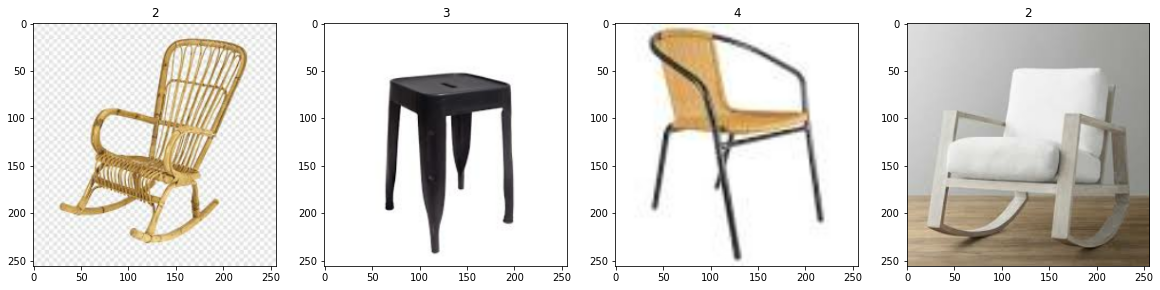

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [24]:
len(data)

79

In [25]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [26]:
test_size+val_size+train_size

78

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [31]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [33]:
logdir='chair_2'


In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [35]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])
#set it 10

Epoch 1/10
56/56 [==============================] - 93s 2s/step - loss: 1.3139 - accuracy: 0.5067 - val_loss: 0.7784 - val_accuracy: 0.6812
Epoch 2/10
56/56 [==============================] - 85s 2s/step - loss: 0.6591 - accuracy: 0.7589 - val_loss: 0.4746 - val_accuracy: 0.8333
Epoch 3/10
56/56 [==============================] - 95s 2s/step - loss: 0.3644 - accuracy: 0.8711 - val_loss: 0.3624 - val_accuracy: 0.8562
Epoch 4/10
56/56 [==============================] - 85s 2s/step - loss: 0.2161 - accuracy: 0.9258 - val_loss: 0.2974 - val_accuracy: 0.9000
Epoch 5/10
56/56 [==============================] - 86s 2s/step - loss: 0.1243 - accuracy: 0.9626 - val_loss: 0.3514 - val_accuracy: 0.8875
Epoch 6/10
56/56 [==============================] - 95s 2s/step - loss: 0.1106 - accuracy: 0.9665 - val_loss: 0.4004 - val_accuracy: 0.8896
Epoch 7/10
56/56 [==============================] - 97s 2s/step - loss: 0.0605 - accuracy: 0.9833 - val_loss: 0.4510 - val_accuracy: 0.8917
Epoch 8/10
56/56 [==

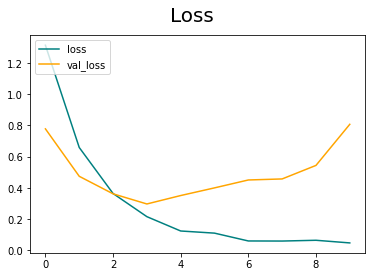

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


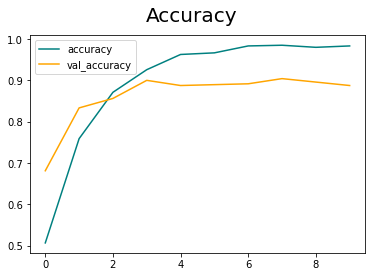

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
#Evaluate

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [40]:
pre = Precision()
re = Recall()
acc = tf.keras.metrics.CategoricalAccuracy()



In [41]:
print(test.as_numpy_iterator())

In [42]:
#TEST

In [43]:
!ls

 chair_2			     model_new_imageclassifier0925.pkl
'image classifier.pkl'		     model_new.pkl
 image_classifier.pkl		     model.png
'manrega data'			     models
'manrega logs'			    'Testing images'
 model_chair.pkl		     training_chair
 model_new_imageclassifier0524.pkl   training_chair_logs


In [44]:
img = cv2.imread('/content/drive/MyDrive/METADATA_22/ML/image_classification/Testing images/chair.jpeg')


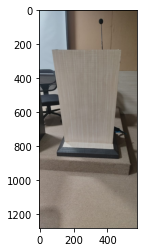

In [45]:
img = cv2.imread('/content/drive/MyDrive/METADATA_22/ML/image_classification/Testing images/podium.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

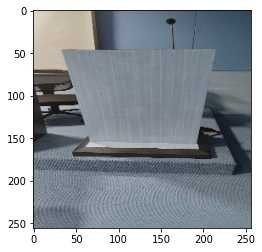

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 166ms/step


In [48]:
ans=yhat.argmax()
ans

2

In [49]:
if ans==0: 
    print(f'building')
elif ans==1:
    print(f'canal')
elif ans==2:
    print(f'dam')    
elif ans==3:
    print(f'field')  
elif ans==4:
    print(f'pond')  
elif ans==5:
    print(f'road')  
elif ans==6:
    print(f'shelter')  


dam


In [50]:
########################################################################################################

Tested the model successfully!!


Making pickle file for deploying.

In [51]:
import pickle
pickle.dump(model, open('model_chair.pkl', 'wb'))

Dumped the model . Now veifying the pickle file.

In [52]:
img = cv2.imread('/content/drive/MyDrive/METADATA_22/ML/image_classification/Testing images/chair.jpeg')

In [53]:
from PIL import Image

In [60]:
im = Image.open(r"/content/drive/MyDrive/METADATA_22/ML/image_classification/Testing images/chair_gaming.jpeg")

In [61]:
newsize = (256, 256)
im = im.resize(newsize)

In [62]:
im = np.asanyarray(im)

In [63]:
pickled_model = pickle.load(open('model_chair.pkl', 'rb'))
ans1=pickled_model.predict(np.expand_dims(im/255, 0))

1/1 [==============================] - 0s 83ms/step


In [64]:
ans1.argmax()

2